In [1]:
import netgen.gui
from ngsolve import *
import numpy as np
import scipy.sparse as sp
from math import pi
from numpy import linalg as LA
import matplotlib.pyplot as plt

### Erstellt ein Quadrat mit der Länge $\pi$ 
### und setzt einen Impuls in der Mitte des Quadrats 

In [2]:
#import netgen.geom2d as geom2dim
#geo = geom2dim.SplineGeometry()

#points = [(0,0),(3*pi,0),(3*pi,3*pi),(0,3*pi)]
#p1,p2,p3,p4 = [geo.AppendPoint(*pnt) for pnt in points]
#curves = [['line',p1,p2],['line',p2,p3],['line',p3,p4],['line',p4,p1]]
#[geo.Append(c) for c in curves]

#mesh = Mesh(geo.GenerateMesh(maxh = 0.2))

#piha = 3*pi/2
#source = exp(-10**2*((x-piha)*(x-piha)+(y-piha)*(y-piha)))
#Draw(source,mesh,name = "pulse")

### Erstellt ein Quadrat mit der Länge $1$ 
### und setzt einen Impuls in der Mitte des Quadrats

In [3]:
import netgen.geom2d as geom2dim
geo = geom2dim.SplineGeometry()
a = 1
points = [(0,0),(a,0),(a,a),(0,a)]
p1,p2,p3,p4 = [geo.AppendPoint(*pnt) for pnt in points]
curves = [['line',p1,p2],['line',p2,p3],['line',p3,p4],['line',p4,p1]]
[geo.Append(c) for c in curves]

mesh = Mesh(geo.GenerateMesh(maxh = 0.1))


piha = a/2
shift = 0
source = exp(-70**2*((x-piha-shift)*(x-piha-shift)+(y-piha-shift)*(y-piha-shift)))
Draw(source,mesh,name = "pulse")

In [4]:
maxind = 40
fes = H1(mesh, order=5,dirichlet=".*")
#fes = H1(mesh, order=5,dirichlet=".*")
gfu = GridFunction(fes,name = "u")
erg = np.zeros([len(gfu.vec),maxind])
fh = np.zeros([len(gfu.vec),maxind])

### Die helmholzgleichung:
$\Delta u - \omega^2 u = f$
### und die Schwache Formulierung:
$\int_{\Omega}\nabla u \nabla v - \omega^2\int_{\Omega}u v = \int_{\Omega}fv$ $v \in V$
### löse die obrige Gleichung mit paar $\omega_i$ und speichere diese $u_i$ in eine Matrix 

In [5]:
#u = fes.TrialFunction()
#v = fes.TestFunction()

#A = BilinearForm(fes)
#F = LinearForm(fes)

#A += (grad(u)*grad(v)- (pi-0.001)**2*u*v)*dx
#F += source*v*dx

#F.Assemble()
#A.Assemble()

#gfu.vec.data = A.mat.Inverse(fes.FreeDofs()) * F.vec
#Draw(gfu,mesh,name = "wave")

In [6]:
u = fes.TrialFunction()
v = fes.TestFunction()

A = BilinearForm(fes)
K = BilinearForm(fes)
M = BilinearForm(fes)
F = LinearForm(fes)

omega = Parameter(1)
A += (grad(u)*grad(v)- omega**2*u*v)*dx
K += grad(u)*grad(v)*dx
M += u*v*dx


#A += 1j*omega*u*v*ds # R 
F += source*v*dx
       
#omega = 1*pi*20     
o = []  

norm = []
for i in range(0,maxind):
    o.append(i*(pi/4))
j = 0
#print("omega: ",omega)
Draw(gfu)
for i in o:   
    omega.Set(i)
    
    
    A.Assemble()
    K.Assemble()
    M.Assemble()
    F.Assemble()
    
    gfu.vec.data = A.mat.Inverse(fes.FreeDofs()) * F.vec
    #Redraw()

    
    
    #erg[:,j] = gfu.vec 
    #rhs[:,j] = F.vec
    #bas[:,j] = gfu
    #print(gfu.cof)
    #if(j == 1):
        #Ah = A.mat
    erg[:,j] = gfu.vec
    print("gif: ",gfu.vec[0])
    fh[:,j] = F.vec
    norm.append(sqrt (Integrate ((gfu)*(gfu),mesh)))
    #exact = sin(pi*x)+sin(pi*y)
    #print ("L2-error:", sqrt (Integrate ( (gfu-exact)*(gfu-exact), mesh)))
    #print("Number of iter: ",j,"omega: ",i,"L2-Norm:",sqrt (Integrate ((gfu)*(gfu),mesh)))
    j = j+1
    #input()
print("erg",erg[:,0])
Ms = M.mat
Ks = K.mat
rows,cols,vals = Ms.COO()
Mh = sp.csr_matrix((vals,(rows,cols)))
rows,cols,vals = Ks.COO()
Kh = sp.csr_matrix((vals,(rows,cols)))

gif:  0.0
gif:  0.0
gif:  0.0
gif:  0.0
gif:  0.0
gif:  0.0
gif:  0.0
gif:  0.0
gif:  0.0
gif:  0.0
gif:  0.0
gif:  0.0
gif:  0.0
gif:  0.0
gif:  0.0
gif:  0.0
gif:  0.0
gif:  0.0
gif:  0.0
gif:  0.0
gif:  0.0
gif:  0.0
gif:  0.0
gif:  0.0
gif:  0.0
gif:  0.0
gif:  0.0
gif:  0.0
gif:  0.0
gif:  0.0
gif:  0.0
gif:  0.0
gif:  0.0
gif:  0.0
gif:  0.0
gif:  0.0
gif:  0.0
gif:  0.0
gif:  0.0
gif:  0.0
erg [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  4.07291185e-05
 -6.98635808e-05  3.61373054e-05]


In [7]:
V, r = np.linalg.qr(erg)
print(V[:,1].dot(V[:,2]))
len(V)


8.326672684688674e-17


2976

In [8]:
#vpi = [pi,2*pi,3*pi,4*pi,5*pi,6*pi,7*pi]
#points = [0.005,0.005,0.005,0.005,0.005,0.005,0.005]
#b = 430
#a = 350
#plt.plot(o[a:b],norm[a:b])
#plt.plot(o,norm)
#plt.xlabel("omega")
#plt.ylabel("L2-Norm")
#plt.plot(vpi,points, "r*")
#plt.savefig('results/resonanz_goal_1_sh00.png')

### Für die erste Metode GramSchmid verwenden um eine orthonormale Koordinatentransformationsmatrix zu erstellen(Euklidische Norm). 

In [9]:
#def GramSchidt(V,u):
#    if V.all() == 0:
#        z = u
#    else:
#        VTu = np.transpose(V).dot(u)
#        VVTu = V.dot(VTu)
#        z = u-VVTu
        
#    z = z/LA.norm(z)
#    return z

In [10]:
#V = np.zeros([len(gfu.vec),maxind])
#for i in range(maxind):
#    #for j in range(100):
#        u = erg[:,i]
#        zi = GramSchidt(V,u)
#        V[:,i] = zi 

In [11]:
#print(len(V))

$$
M_N = V^T \cdot M_h \cdot V
$$

$$
K_N = V^T \cdot K_h \cdot V
$$

$$
f_N = V^T \cdot f_h
$$

$$
u_i = (K_N - \omega^2_iM_N)^{-1} \cdot f_N
$$

In [12]:
MN = np.transpose(V).dot(Mh.dot(V))
KN = np.transpose(V).dot(Kh.dot(V))
fN = np.transpose(V).dot(fh)
#a = [1,3]
#print(a[0]*MN)
#print("Hallo: ",MN)

In [13]:
iteration = int(1e5)
interval = 30
factor = interval / iteration
omegaN = []
norm_L2 =[]
uN = np.zeros([maxind,iteration])
for i in range(iteration):
    omegaN.append(factor*i)
    uN[:,i] = np.linalg.solve(KN-omegaN[i]**2*MN, fN[0])
    norm_L2.append(sqrt(uN[:,i].dot(uN[:,i])))
#uN = zeros([maxind,it])
#

points = []
viel = []
for i in range(100):
    points.append(10)
    viel.append(i*pi)


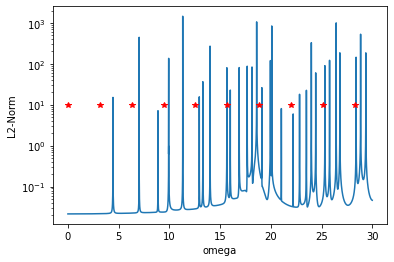

In [14]:
c = 350000
d = 520000
plt.semilogy(omegaN,norm_L2)
plt.plot(viel[0:10], points[0:10], "r*")
plt.xlabel("omega")
plt.ylabel("L2-Norm")
plt.savefig('results/resonanz_RB_40.png')

In [15]:
new = uN[:,20000].dot(np.transpose(V))
print(len(new))
gif = GridFunction(fes,name = "gif")
gif.vec.FV().NumPy()[:] = new
Draw(gif)
print(V[:,0])
print(erg[:,0])

2976
[ 0.         -0.         -0.         ... -0.01536471  0.02635544
 -0.01363249]
[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  4.07291185e-05
 -6.98635808e-05  3.61373054e-05]
